## **Setup the environment**

In [4]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'


--2025-04-26 11:21:06--  https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
Resolving www.lancaster.ac.uk (www.lancaster.ac.uk)... 148.88.65.80, 2001:630:80:2ff::80:1
Connecting to www.lancaster.ac.uk (www.lancaster.ac.uk)|148.88.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112640 (110K) [application/x-gzip]
Saving to: ‘lorasim-20170710.tgz’

lorasim-20170710.tg 100%[===================>] 110.00K   508KB/s    in 0.2s    

2025-04-26 11:21:06 (508 KB/s) - ‘lorasim-20170710.tgz’ saved [112640/112640]

lorasim/
lorasim/loraDir.py
lorasim/loraDirMulBS.py
lorasim/oneDirectionalLoraIntf.py
lorasim/requirements.txt
lorasim/directionalLoraIntf.py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2-minimal
  python2.7 python2.7-minimal
Suggested packages:
  python2-doc python-tk pyth

## **Play with the simulator**

### **Import libraries**

First part, figure 5

In [1]:
import os
import pandas as pd
import math

### **Execute simulations**

In [2]:
import subprocess

def simulate(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )



In [5]:
duration = 86400000
tx_rate = 1e6

for n_nodes in list(range(0,50)) + list(range(50,300,50)) + list(range(300,1601,100)):
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 3, duration)
  simulate(n_nodes, tx_rate, 4, duration)
  simulate(n_nodes, tx_rate, 5, duration)


Simulating 0 nodes
Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 11 nodes
Simulating 12 nodes
Simulating 13 nodes
Simulating 14 nodes
Simulating 15 nodes
Simulating 16 nodes
Simulating 17 nodes
Simulating 18 nodes
Simulating 19 nodes
Simulating 20 nodes
Simulating 21 nodes
Simulating 22 nodes
Simulating 23 nodes
Simulating 24 nodes
Simulating 25 nodes
Simulating 26 nodes
Simulating 27 nodes
Simulating 28 nodes
Simulating 29 nodes
Simulating 30 nodes
Simulating 31 nodes
Simulating 32 nodes
Simulating 33 nodes
Simulating 34 nodes
Simulating 35 nodes
Simulating 36 nodes
Simulating 37 nodes
Simulating 38 nodes
Simulating 39 nodes
Simulating 40 nodes
Simulating 41 nodes
Simulating 42 nodes
Simulating 43 nodes
Simulating 44 nodes
Simulating 45 nodes
Simulating 46 nodes
Simulating 47 nodes
Simulating 48 nodes
Simulating 49 nodes
Simulating

In [6]:
data3 = pd.read_csv("exp4.dat", sep=" ")
data4 = pd.read_csv("exp3.dat", sep=" ")
data5 = pd.read_csv("exp5.dat", sep=" ")


In [7]:

data3["der"] = (data3["nrTransmissions"] - data3["nrCollisions"]) / data3["nrTransmissions"]
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]
data5["der"] = (data5["nrTransmissions"] - data5["nrCollisions"]) / data5["nrTransmissions"]

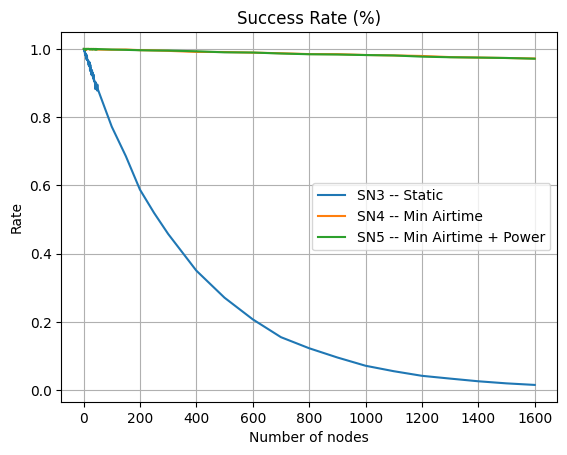

In [8]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(data3["#nrNodes"], data3["der"], label="SN3 -- Static")
plt.plot(data4["#nrNodes"], data4["der"], label="SN4 -- Min Airtime")
plt.plot(data5["#nrNodes"], data5["der"], label="SN5 -- Min Airtime + Power")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

Second part, figure 7

In [9]:
def simulate_multiple(n_nodes,tx_rate, exp, duration, base_stations, collision = 1):
  env = os.environ.copy()
  env["MPLBACKEND"] = "Agg"

  result = subprocess.run(
      [
          "python2",
          "lorasim/loraDirMulBS.py",
          str(int(n_nodes)),
          str(int(tx_rate)),
          str(int(exp)),
          str(int(duration)),
          str(int(base_stations)), #New parameter
          str(int(collision)) #New parameter
      ],
      env=env,
      capture_output=True,
      text=True,
  )


In [ ]:
duration = 86400000
tx_rate = 1e6

base_stations_list = [1, 2, 3, 4, 8, 24]
exp = 0
for base_stations in base_stations_list:
  print(f"Simulating {base_stations} base stations")
  for n_nodes in list(range(0,50)) + list(range(50,300,50)) + list(range(300,1601,100)):
    print(f"Simulating {n_nodes} nodes")
    simulate_multiple(n_nodes, tx_rate, exp, duration, base_stations, 1)

Simulating 1 base stations
Simulating 0 nodes
Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 11 nodes
Simulating 12 nodes
Simulating 13 nodes
Simulating 14 nodes
Simulating 15 nodes
Simulating 16 nodes
Simulating 17 nodes
Simulating 18 nodes
Simulating 19 nodes
Simulating 20 nodes
Simulating 21 nodes
Simulating 22 nodes
Simulating 23 nodes
Simulating 24 nodes
Simulating 25 nodes
Simulating 26 nodes
Simulating 27 nodes
Simulating 28 nodes
Simulating 29 nodes
Simulating 30 nodes
Simulating 31 nodes
Simulating 32 nodes
Simulating 33 nodes
Simulating 34 nodes
Simulating 35 nodes
Simulating 36 nodes
Simulating 37 nodes
Simulating 38 nodes
Simulating 39 nodes
Simulating 40 nodes
Simulating 41 nodes
Simulating 42 nodes
Simulating 43 nodes
Simulating 44 nodes
Simulating 45 nodes
Simulating 46 nodes
Simulating 47 nodes
Simulating 48 nodes
Sim

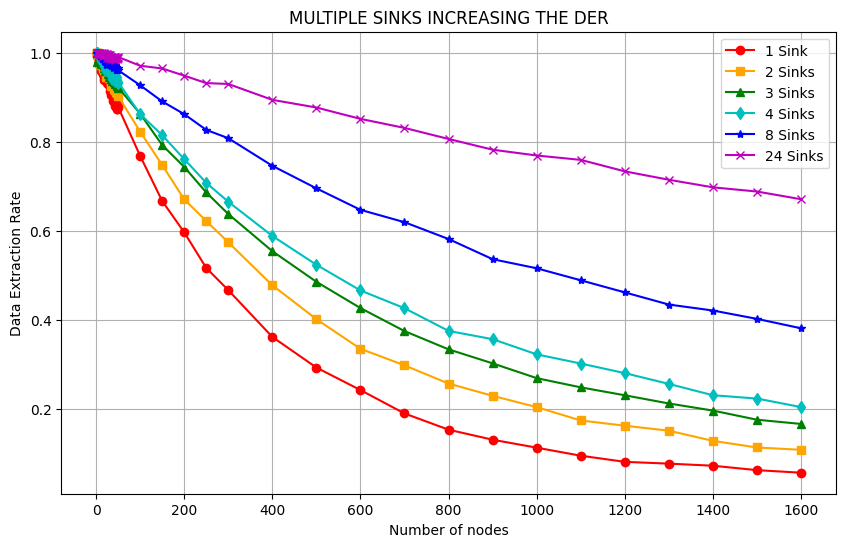

In [ ]:
base_stations_list = [1, 2, 3, 4, 8, 24]
exp = 0
colors = ['r', 'orange', 'g', 'c', 'b', 'm']
markers = ['o', 's', '^', 'd', '*', 'x']

plt.figure(figsize=(10, 6))

for i, base_stations in enumerate(base_stations_list):
    fname = f"exp{exp}BS{base_stations}.dat"

    data = pd.read_csv(fname, sep=" ", comment="#", names = ["nrNodes", "DER"])

    plt.plot(data["nrNodes"],
             data["DER"],
             label=f"{base_stations} Sink{'s' if base_stations > 1 else ''}",
             marker=markers[i% len(markers)],
             color=colors[i % len(colors)],)

plt.title("MULTIPLE SINKS INCREASING THE DER")
plt.xlabel("Number of nodes")
plt.ylabel("Data Extraction Rate")
plt.legend()
plt.grid(True)